In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sys
sys.path.append("../..")
from func.EI_calculation import unique_ca, en_unique_ca, synergy_ca
from ca_generate import cellular_automaton_homo
# from ca_generate import cellular_automaton2
plt.rcParams['figure.figsize'] = (15, 12)
%matplotlib inline

def trans10_to_base(number, base = 2, min_length=0):
    
    if min_length < 1:
        raise ValueError("Minimum length must be at least 1")
    
    if number == 0:
        return '0' * min_length

    digits = []
    while number > 0:
        digits.insert(0, str(number % base))
        number //= base

    # 将数字列表转换为字符串，并在前面填充字符以达到最小长度
    padded_digits = ''.join(digits).zfill(min_length)

    return padded_digits

def langton(rule):
    strs = trans10_to_base(rule, min_length=8)
    n = strs.count('1')
    lambdas = n / 8
    return lambdas

# 已知动力学 动力学异质 噪音不同

# Cal EI of local variables

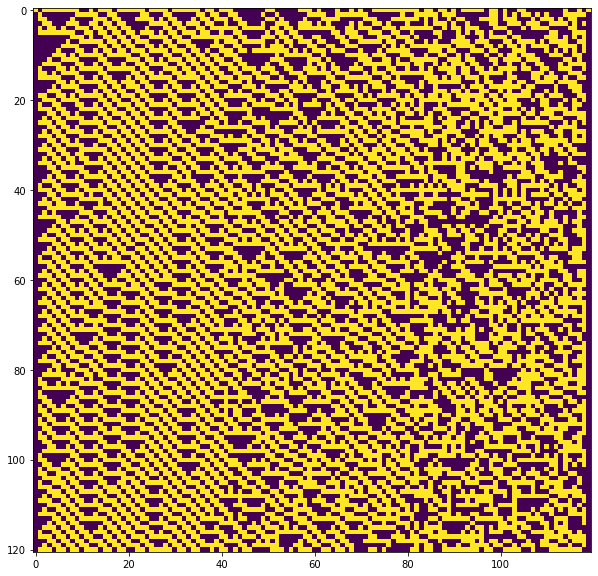

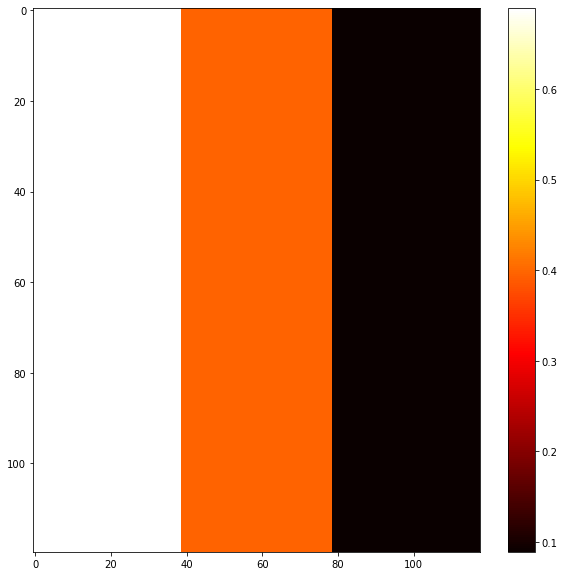

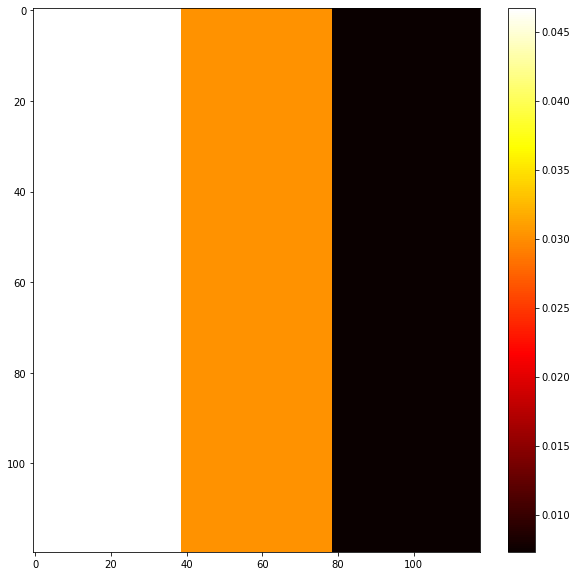

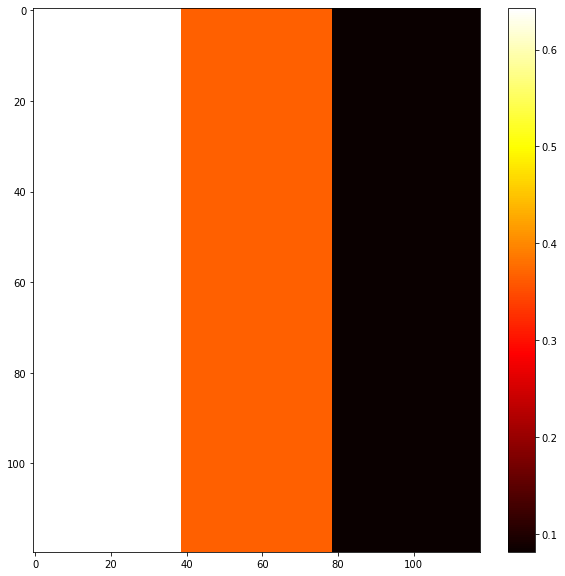

In [33]:
seed = 2050
random.seed(seed)
np.random.seed(seed)
showmatrix,ei_matrix1, ei_matrix2, syn_matrix= cellular_automaton_homo(rule=110, generations=120, p0_list=[0.01,0.1,0.3], size=120,middle_size=1)

# 朗顿参数&Wolframe分类

In [3]:
#woframe
ca_classification = {
    'Class I': [8, 0, 32, 40, 128, 136, 160, 168],
    'Class II': [
        1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 
        19, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 
        37, 38, 42, 43, 44, 46, 50, 51, 56, 57, 58, 62, 
        72, 73, 74, 76, 77, 78, 94, 104, 108, 130, 132, 
        134, 138, 140, 142, 152, 154, 156, 162, 164, 170, 
        172, 178, 184, 200, 204, 232
    ],
    'Class III': [
        18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150
    ],
    'Class IV': [41, 54, 106, 110]
}

class_name_to_num = {
    'Class I': 1,
    'Class II': 2,
    'Class III': 3,
    'Class IV': 4
}

class_of_rules = np.zeros(256)

for number in range(256):
    for class_name, numbers in ca_classification.items():
            if number in numbers:
                class_of_rules[number] = class_name_to_num[class_name]

class_of_rules

array([1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 0.,
       0., 3., 2., 0., 0., 3., 2., 2., 2., 2., 2., 2., 2., 3., 0., 1., 2.,
       2., 2., 2., 2., 2., 0., 1., 4., 2., 2., 2., 3., 2., 0., 0., 0., 2.,
       2., 0., 0., 4., 0., 2., 2., 2., 0., 3., 0., 2., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 2., 2., 2., 0., 2., 2., 2., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 3., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 2., 3., 4., 0., 2., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 3., 0., 0., 0., 3., 0., 1., 0., 2., 0., 2., 0., 2., 0.,
       1., 0., 2., 0., 2., 0., 2., 0., 0., 0., 3., 0., 0., 0., 3., 0., 2.,
       0., 2., 0., 2., 0., 0., 0., 1., 0., 2., 0., 2., 0., 0., 0., 1., 0.,
       2., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.,
       2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [5]:
from ca_generate import generate_markov
# alpha = 0.5
# def live_comb(syn, un, alpha):
#     return syn**alpha * un**(1 - alpha)

un_en_list = []
un_list = []
syn_list = []
lam_list = []
mech_size = 1
for rule in range(256):
    markov_m = generate_markov(p0=0, rule=rule, mech_size=mech_size)
    un = unique_ca(markov_m,mech_size)[0]
    un_en = en_unique_ca(markov_m,mech_size)[0]
    syn = synergy_ca(markov_m,mech_size)
    #print('rule = '+str(rule)+' ei ='+str(ei))
    un_en_list.append(un_en)
    un_list.append(un)
    syn_list.append(syn)
    lam_list.append(langton(rule))

un_list

[0.0,
 0.1379253809700299,
 0.1379253809700299,
 0.3112781244591328,
 0.1379253809700299,
 0.0,
 0.0,
 0.048794940695398484,
 0.1379253809700299,
 0.0,
 0.0,
 0.048794940695398484,
 0.3112781244591328,
 0.048794940695398484,
 0.048794940695398484,
 0.0,
 0.1379253809700299,
 0.3112781244591328,
 0.3112781244591328,
 0.5487949406953986,
 0.0,
 0.048794940695398484,
 0.048794940695398484,
 0.18872187554086717,
 0.0,
 0.048794940695398484,
 0.048794940695398484,
 0.18872187554086717,
 0.048794940695398484,
 0.0,
 0.0,
 0.048794940695398484,
 0.1379253809700299,
 0.3112781244591328,
 0.3112781244591328,
 0.5487949406953986,
 0.0,
 0.048794940695398484,
 0.048794940695398484,
 0.18872187554086717,
 0.0,
 0.048794940695398484,
 0.048794940695398484,
 0.18872187554086717,
 0.048794940695398484,
 0.0,
 0.0,
 0.048794940695398484,
 0.3112781244591328,
 0.5487949406953986,
 0.5487949406953986,
 1.0,
 0.048794940695398484,
 0.18872187554086717,
 0.18872187554086717,
 0.5487949406953986,
 0.048794

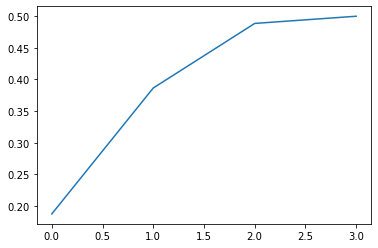

In [6]:
mean_list1 = []
std_list1 = []
mean_list2 = []
std_list2 = []
mean_list3 = []
std_list3 = []
mean_list4 = []
std_list4 = []

for class_name, numbers in class_name_to_num.items():
    un_class = []
    un_en_class = []
    syn_class = []
    lam_class = []
    for rule in range(256):
        if rule in ca_classification[class_name]:
            un_class.append(un_list[rule])
            un_en_class.append(un_en_list[rule])
            syn_class.append(syn_list[rule])
            lam_class.append(lam_list[rule])
            
    mean_list1.append(np.mean(un_class))
    std_list1.append(np.std(un_class))
    mean_list2.append(np.mean(un_en_class))
    std_list2.append(np.std(un_en_class))
    mean_list3.append(np.mean(syn_class))
    std_list3.append(np.std(syn_class))
    mean_list4.append(np.mean(lam_class))
    std_list4.append(np.std(lam_class))

    
mean_list1 = np.array(mean_list1)
mean_list2 = np.array(mean_list2)
mean_list3 = np.array(mean_list3)
mean_list4 = np.array(mean_list4)

std_list1 = np.array(std_list1)
std_list2 = np.array(std_list2)
std_list3 = np.array(std_list3)
std_list4 = np.array(std_list4)


plt.plot(mean_list4)

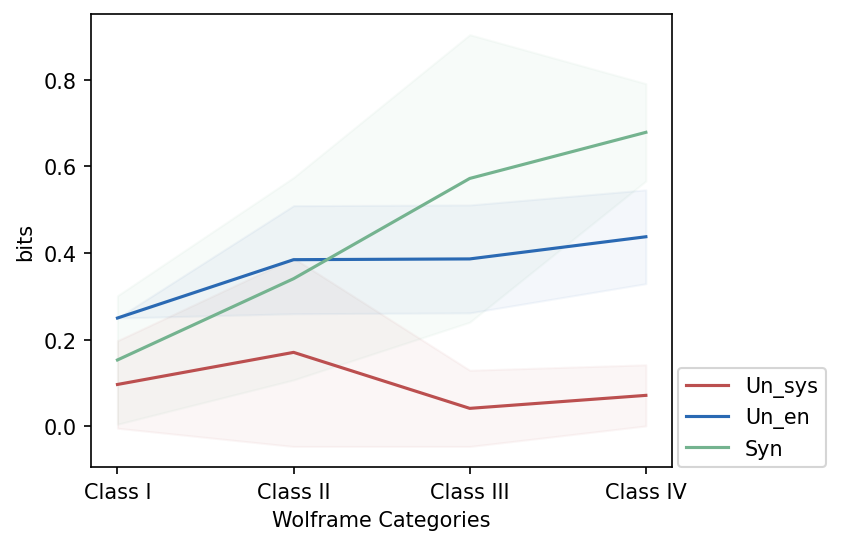

In [8]:
plt.figure(figsize=(5,4), dpi=150)
x_labels = ['Class I', 'Class II', 'Class III', 'Class IV']
# 绘制折线图
plt.plot(x_labels, mean_list1, color='#BB4F4F', label='Un_sys')
plt.fill_between(x_labels, mean_list1+std_list1, mean_list1-std_list1, color='#BB4F4F', alpha=0.05)
plt.plot(x_labels, mean_list2, color='#2A69B3', label='Un_en')
plt.fill_between(x_labels, mean_list2+std_list2, mean_list2-std_list2, color='#2A69B3', alpha=0.05)
plt.plot(x_labels, mean_list3, color='#74B38F', label='Syn')
plt.fill_between(x_labels, mean_list3+std_list3, mean_list3-std_list3, color='#74B38F', alpha=0.05)
#plt.plot(x_labels, mean_vivid, color='#BB4F4F', label='vividness')
#plt.fill_between(x_labels, mean_vivid+std_vivid, mean_vivid-std_vivid, color='#BB4F4F', alpha=0.05)
#plt.plot(x_labels, mean_list4, color='#FFA500', label='Lam')
#plt.fill_between(x_labels, mean_list4+std_list4, mean_list4-std_list4, color='#FFA500', alpha=0.05)
# 添加图表标题和轴标签
#plt.title('Mean Values with Standard Deviation Error Bars')
plt.xlabel('Wolframe Categories')
plt.ylabel('bits')

# 显示图例
plt.legend(loc=[1.01,0])

# 显示图表
plt.show()

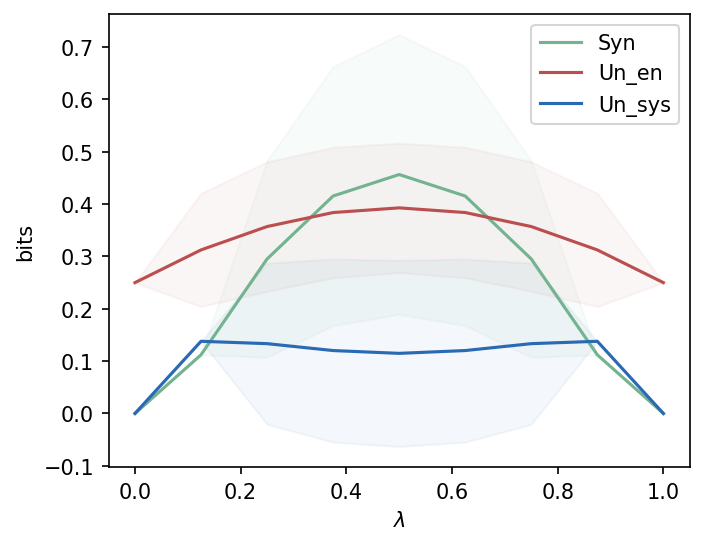

In [9]:
langton_lams_syn = {i:[] for i in range(9)}
langton_lams_un_en = {i:[] for i in range(9)}
langton_lams_un = {i:[] for i in range(9)}

for r in range(256):
    idx = int(langton(r) * 8)
    langton_lams_syn[idx].append(syn_list[r])
    langton_lams_un_en[idx].append(un_en_list[r])
    langton_lams_un[idx].append(un_list[r])


means = np.array([np.mean(values) for values in langton_lams_syn.values()])
std_devs = np.array([np.std(values) for values in langton_lams_syn.values()])
means1 = np.array([np.mean(values) for values in langton_lams_un_en.values()])
std_devs1 = np.array([np.std(values) for values in langton_lams_un_en.values()])
means2 = np.array([np.mean(values) for values in langton_lams_un.values()])
std_devs2 = np.array([np.std(values) for values in langton_lams_un.values()])


plt.figure(figsize=(5,4), dpi=150)
# 绘制折线图
#plt.plot([i/8 for i in range(9)], means3, color='#BB4F4F', label='vividness')
#plt.fill_between([i/8 for i in range(9)], means3+std_devs3, means3-std_devs3, color='#BB4F4F', alpha=0.05)
plt.plot([i/8 for i in range(9)], means, color='#74B38F', label='Syn')
plt.fill_between([i/8 for i in range(9)], means+std_devs, means-std_devs, color='#74B38F', alpha=0.05)
plt.plot([i/8 for i in range(9)], means1, color='#BB4F4F', label='Un_en')
plt.fill_between([i/8 for i in range(9)], means1+std_devs1, means1-std_devs1, color='#BB4F4F', alpha=0.05)
plt.plot([i/8 for i in range(9)], means2, color='#2A69B3', label='Un_sys')
plt.fill_between([i/8 for i in range(9)], means2+std_devs2, means2-std_devs2, color='#2A69B3', alpha=0.05)
plt.xlabel('$\lambda$')
plt.ylabel('bits')
plt.legend()

# 互信息计算

In [2]:
import func.entropy_estimators as ee

langton_lams_mi = {i:[] for i in range(9)}
def ca_mi(showmatrix):
    x = showmatrix[:-1, 1:-1].reshape(-1)
    y = showmatrix[1:, 1:-1].reshape(-1)
    mi = ee.midd(x,y)
    return mi

for r in range(256):
    showmatrix, _, _, _= cellular_automaton_homo(rule=r, generations=120, p0_list=[0], size=120, mech_size=1)
    idx = int(langton(r) * 8)
    langton_lams_mi[idx].append(ca_mi(showmatrix))
    
 

with open('langton_lams_mi.pkl', 'wb') as f:
    pickle.dump(langton_lams_mi, f)

NameError: name 'langton' is not defined

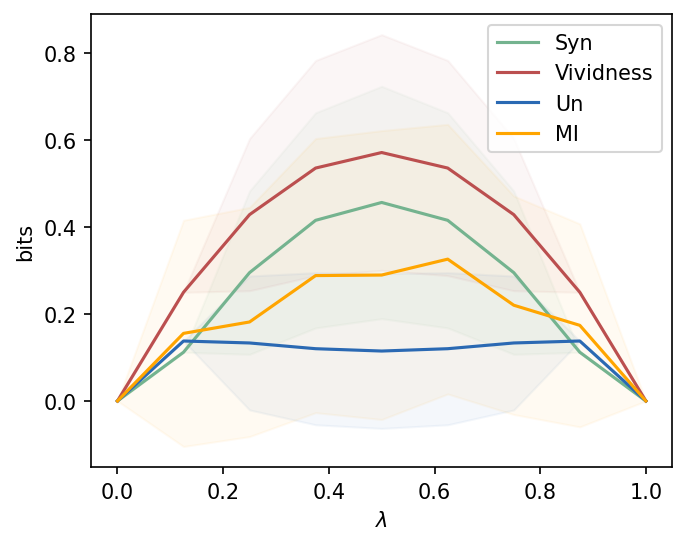

In [11]:
means4 = np.array([np.mean(values) for values in langton_lams_mi.values()])
std_devs4 = np.array([np.std(values) for values in langton_lams_mi.values()])

plt.figure(figsize=(5,4), dpi=150)
# 绘制折线图
plt.plot([i/8 for i in range(9)], means, color='#74B38F', label='Syn')
plt.fill_between([i/8 for i in range(9)], means+std_devs, means-std_devs, color='#74B38F', alpha=0.05)
# plt.plot([i/8 for i in range(9)], means3, color='#BB4F4F', label='vividness')
# plt.fill_between([i/8 for i in range(9)], means3+std_devs3, means3-std_devs3, color='#BB4F4F', alpha=0.05)
plt.plot([i/8 for i in range(9)], means1, color='#BB4F4F', label='Vividness')
plt.fill_between([i/8 for i in range(9)], means1+std_devs1, means1-std_devs1, color='#BB4F4F', alpha=0.05)
plt.plot([i/8 for i in range(9)], means2, color='#2A69B3', label='Un')
plt.fill_between([i/8 for i in range(9)], means2+std_devs2, means2-std_devs2, color='#2A69B3', alpha=0.05)
plt.plot([i/8 for i in range(9)], means4, color='#FFA500', label='MI')
plt.fill_between([i/8 for i in range(9)], means4+std_devs4, means4-std_devs4, color='#FFA500', alpha=0.05)
plt.xlabel('$\lambda$')
plt.ylabel('bits')
plt.legend()

Text(0, 0.5, 'bits')

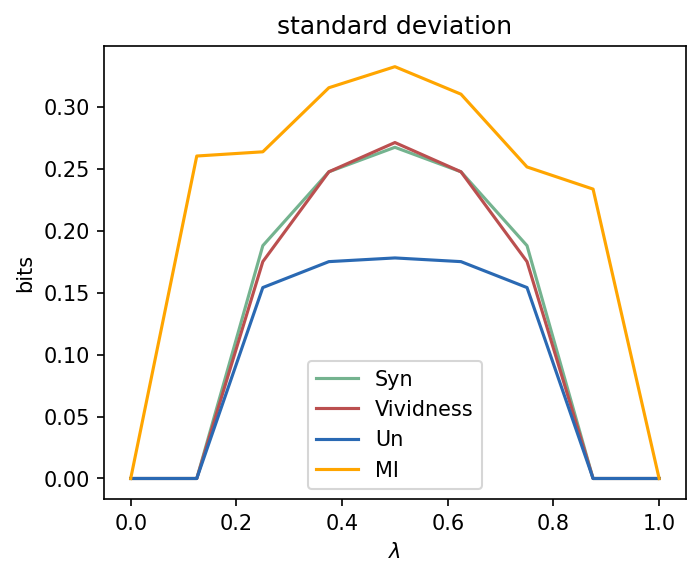

In [12]:
plt.figure(figsize=(5,4), dpi=150)
plt.plot([i/8 for i in range(9)], std_devs, color='#74B38F', label='Syn')
plt.plot([i/8 for i in range(9)], std_devs1, color='#BB4F4F', label='Vividness')
plt.plot([i/8 for i in range(9)], std_devs2, color='#2A69B3', label='Un')
plt.plot([i/8 for i in range(9)], std_devs4, color='#FFA500', label='MI')
plt.title("standard deviation")
plt.legend()
plt.xlabel("$\lambda$")
plt.ylabel("bits")

# 不同初始条件下的互信息

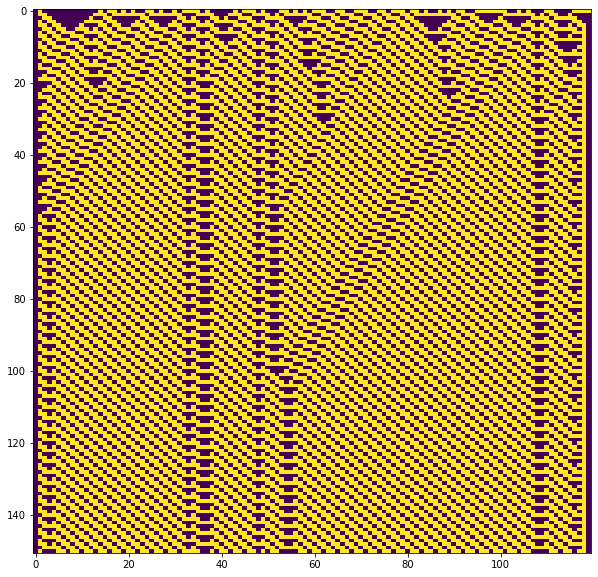

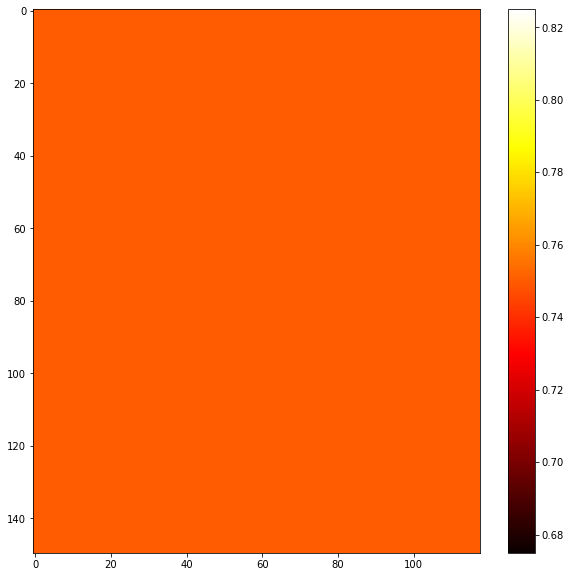

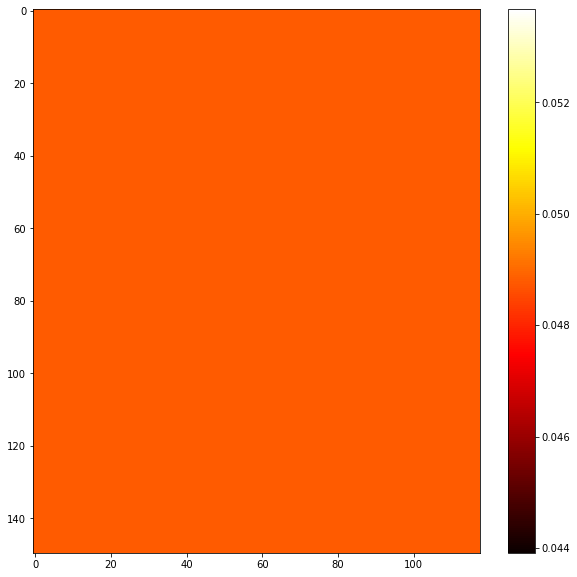

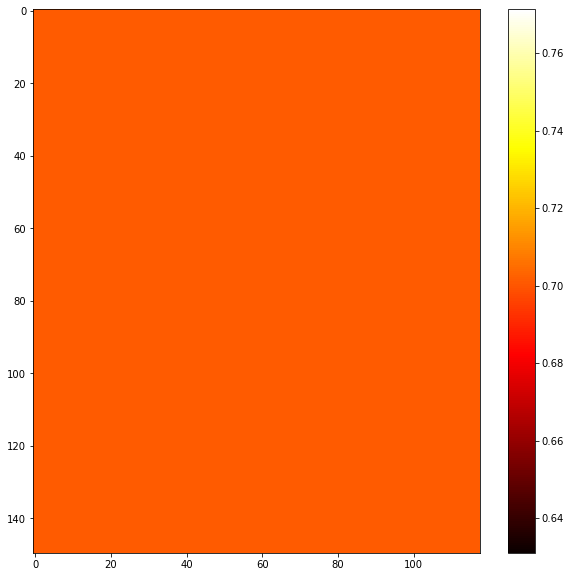

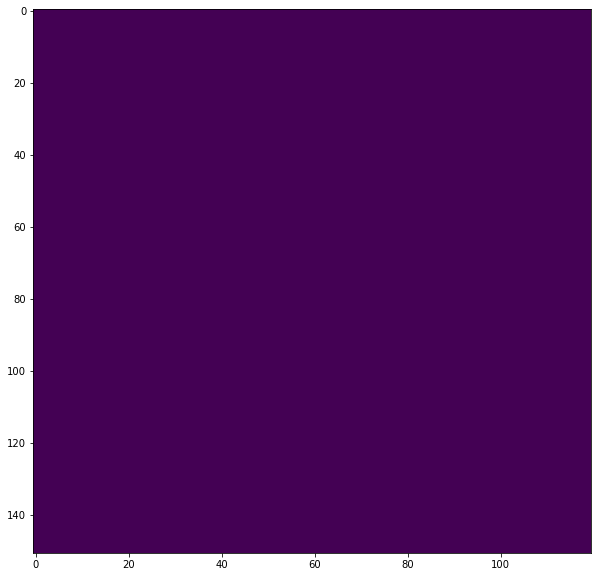

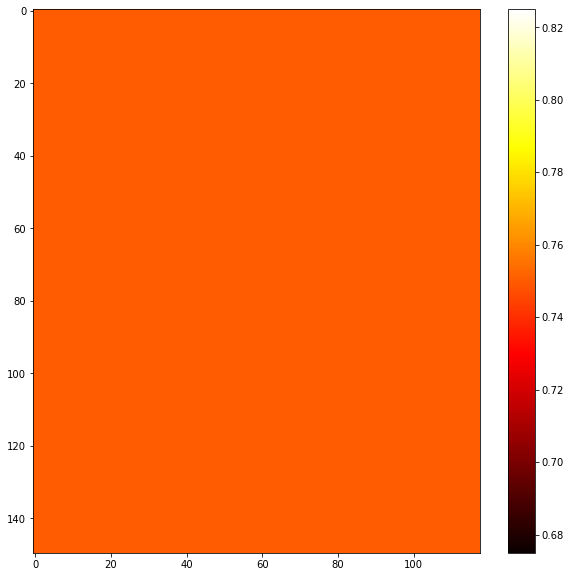

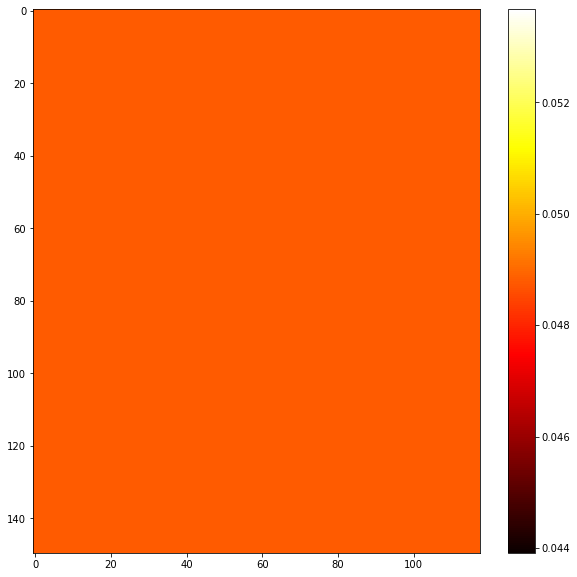

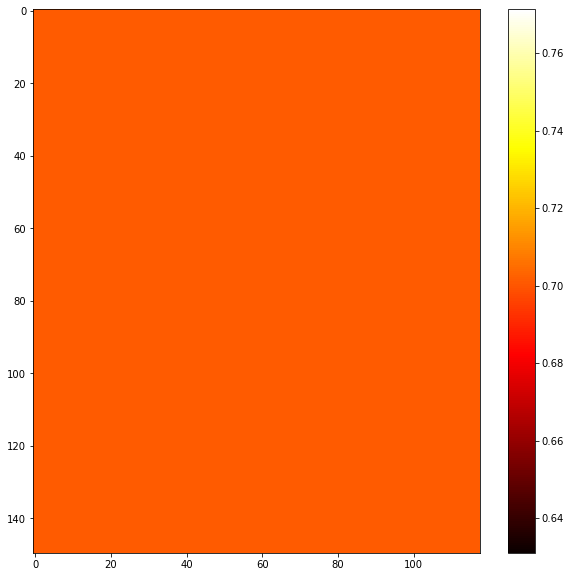

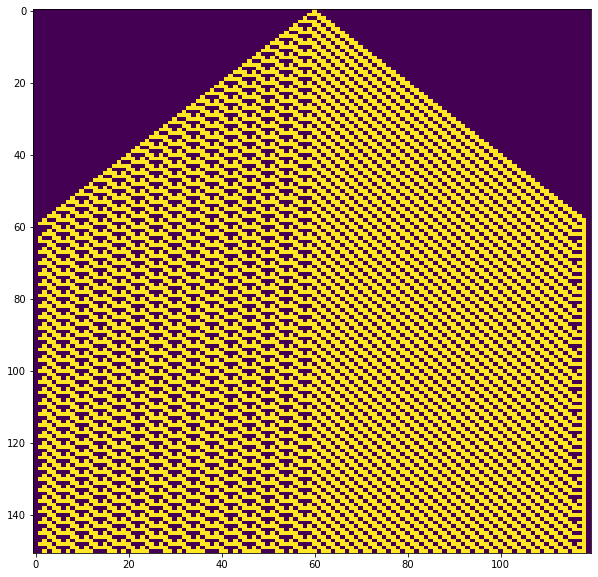

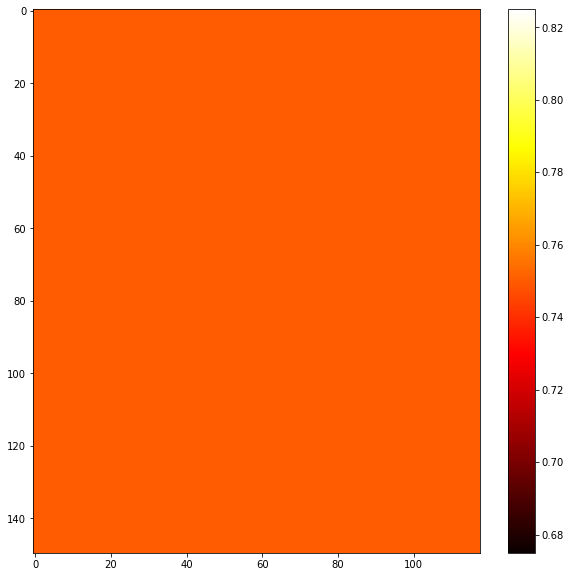

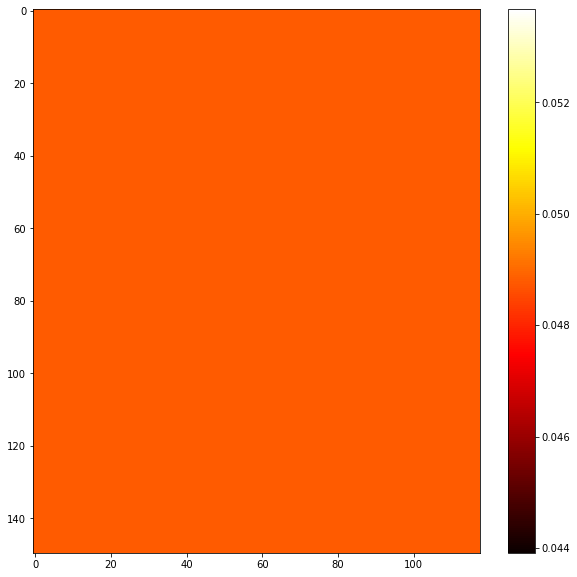

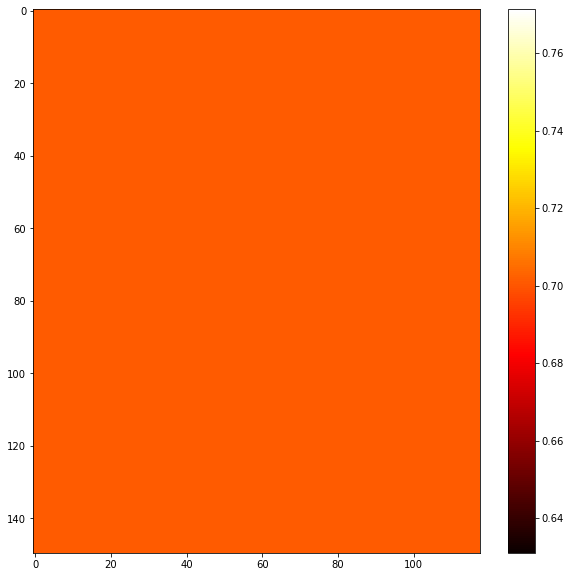

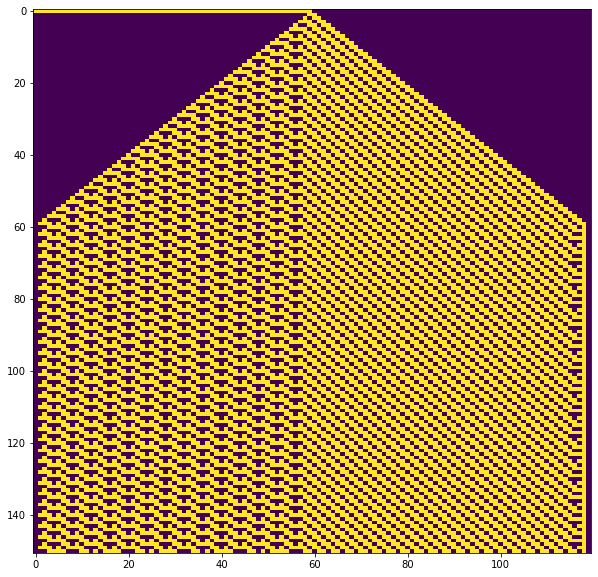

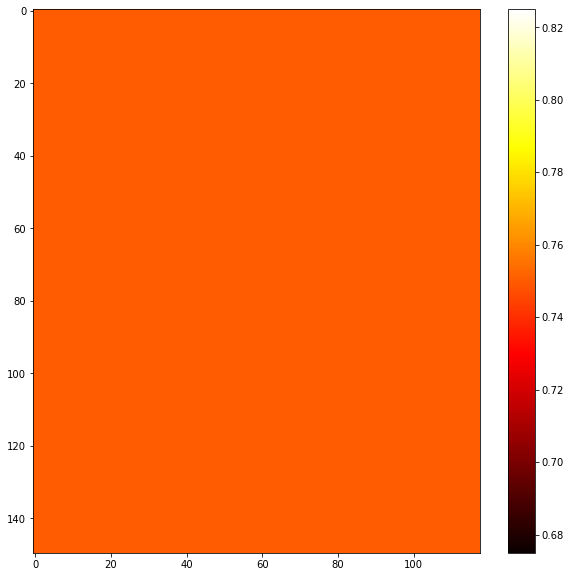

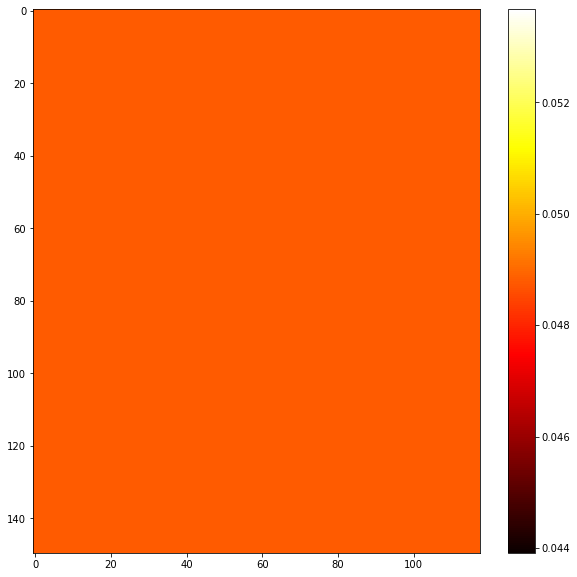

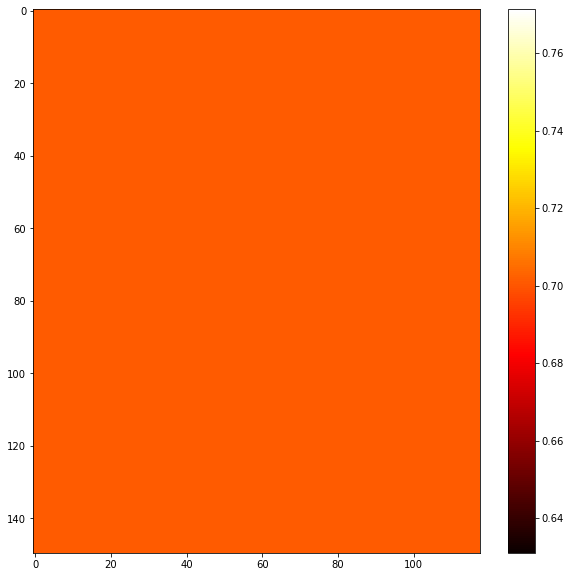

(array([[1., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 1., 0.],
        [0., 1., 1., ..., 1., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([[0.  , 0.75, 0.75, ..., 0.75, 0.75, 0.  ],
        [0.  , 0.75, 0.75, ..., 0.75, 0.75, 0.  ],
        [0.  , 0.75, 0.75, ..., 0.75, 0.75, 0.  ],
        ...,
        [0.  , 0.75, 0.75, ..., 0.75, 0.75, 0.  ],
        [0.  , 0.75, 0.75, ..., 0.75, 0.75, 0.  ],
        [0.  , 0.75, 0.75, ..., 0.75, 0.75, 0.  ]]),
 array([[0.        , 0.04879494, 0.04879494, ..., 0.04879494, 0.04879494,
         0.        ],
        [0.        , 0.04879494, 0.04879494, ..., 0.04879494, 0.04879494,
         0.        ],
        [0.        , 0.04879494, 0.04879494, ..., 0.04879494, 0.04879494,
         0.        ],
        ...,
        [0.        , 0.04879494, 0.04879494, ..., 0.04879494, 0.04879494,
         0.        ],
        [0.        , 0.04879494, 

In [6]:
cellular_automaton_homo(rule=110, generations=150, p0_list=[0], size=120, mech_size=1, init='random', figure_show=True)
cellular_automaton_homo(rule=110, generations=150, p0_list=[0], size=120, mech_size=1, init='zeros', figure_show=True)
cellular_automaton_homo(rule=110, generations=150, p0_list=[0], size=120, mech_size=1, init='fix_point', figure_show=True)
cellular_automaton_homo(rule=110, generations=150, p0_list=[0], size=120, mech_size=1, init='two_parts', figure_show=True)

In [7]:
import func.entropy_estimators as ee

def ca_mi(showmatrix):
    x = showmatrix[:-1, 1:-1].reshape(-1)
    y = showmatrix[1:, 1:-1].reshape(-1)
    mi = ee.midd(x,y)
    return mi

mi_ran, mi_0, mi_fix, mi_parts = [], [], [], []
for r in range(256):
    showmatrix, _, _, _= cellular_automaton_homo(rule=r, generations=150, p0_list=[0], size=120, mech_size=1, init='random')
    mi_ran.append(ca_mi(showmatrix))
    showmatrix, _, _, _= cellular_automaton_homo(rule=r, generations=150, p0_list=[0], size=120, mech_size=1, init='zeros')
    mi_0.append(ca_mi(showmatrix))
    showmatrix, _, _, _= cellular_automaton_homo(rule=r, generations=150, p0_list=[0], size=120, mech_size=1, init='fix_point')
    mi_fix.append(ca_mi(showmatrix))
    showmatrix, _, _, _= cellular_automaton_homo(rule=r, generations=150, p0_list=[0], size=120, mech_size=1, init='two_parts')
    mi_parts.append(ca_mi(showmatrix))
 

In [9]:
np.save('results/mi_ran.npy', mi_ran)
np.save('results/mi_0.npy', mi_0)
np.save('results/mi_fix.npy', mi_fix)
np.save('results/mi_parts.npy', mi_parts)

In [13]:
mis = np.zeros([4,256])
mis[0,:] = mi_ran
mis[1,:] = mi_0
mis[2,:] = mi_fix
mis[3,:] = mi_parts
mi_stds = np.std(mis,axis=0)
mi_stds

array([0.00000000e+00, 1.13084680e-01, 3.02521236e-03, 1.90672214e-01,
       2.58305887e-06, 1.14046640e-01, 3.55680051e-03, 1.87954009e-01,
       1.84254985e-03, 2.84597981e-02, 6.86215294e-03, 3.34225478e-01,
       6.02319496e-03, 6.69865709e-03, 2.15307614e-02, 3.42791824e-01,
       2.21816448e-03, 1.84510147e-01, 1.98378029e-01, 4.94775994e-01,
       2.99415614e-03, 1.85197064e-01, 1.16873248e-01, 4.95071301e-01,
       3.75409948e-03, 1.24132660e-02, 1.52316380e-01, 2.58762450e-01,
       1.30312772e-02, 1.60736077e-02, 2.45894762e-02, 1.80363404e-01,
       2.50919268e-01, 2.23915027e-01, 3.40650632e-01, 3.18989046e-01,
       1.36917889e-01, 1.83962583e-01, 2.46053901e-01, 2.12886428e-01,
       4.68201925e-02, 1.03304376e-01, 1.79518881e-01, 3.26496397e-01,
       1.72270301e-02, 1.85923663e-01, 3.67010811e-02, 3.19673600e-01,
       3.25903585e-01, 3.18543574e-01, 3.96847354e-01, 4.79719842e-01,
       2.72932952e-01, 2.60373786e-01, 1.91679955e-01, 4.77070921e-01,
      

Text(0, 0.5, 'MI')

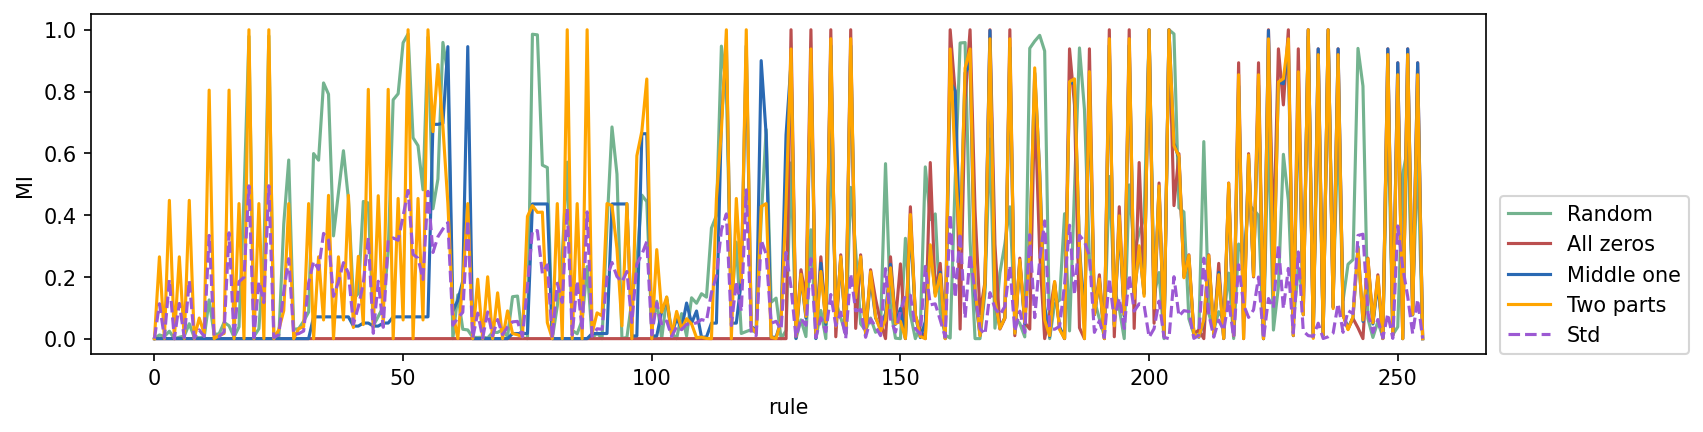

In [17]:
plt.figure(figsize=(12,3), dpi=150)
plt.plot(range(256), mi_ran, color='#74B38F', label='Random')
plt.plot(range(256), mi_0, color='#BB4F4F', label='All zeros')
plt.plot(range(256), mi_fix, color='#2A69B3', label='Middle one')
plt.plot(range(256), mi_parts, color='#FFA500', label='Two parts')
plt.plot(range(256), mi_stds, color='#9C59D3', linestyle='--', label='Std')
plt.legend(loc=[1.01,0])
plt.xlabel("rule")
plt.ylabel("MI")

In [3]:
mi_ran, mi_0, mi_fix, mi_parts

(0.14167286403672297, 0.0, 0.0002683620096805006, 0.0003528891398046907)

# 已知动力学 动力学同质

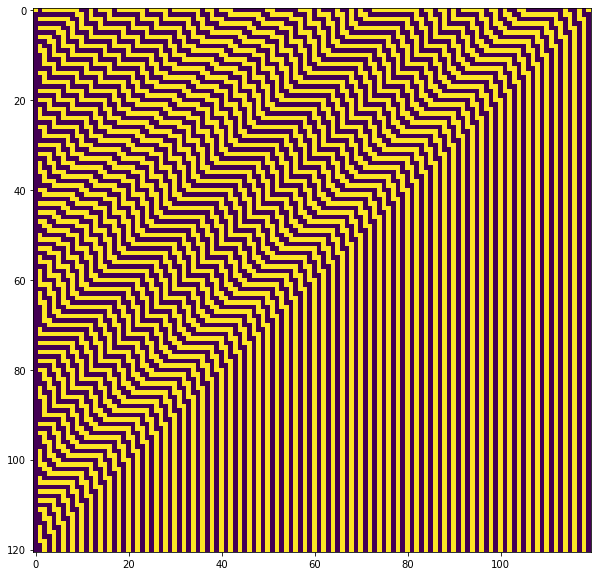

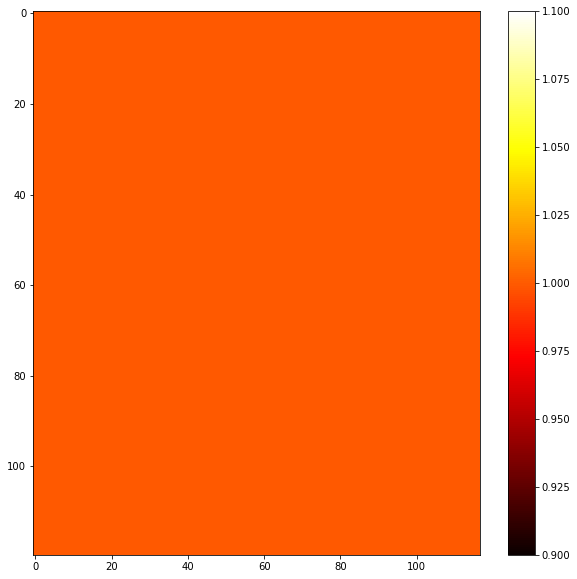

In [31]:

seed = 2050
random.seed(seed)
np.random.seed(seed)
showmatrix,ei_matrix = cellular_automaton2(rule=170, generations=120, p0_list=[0], size=120, mech_size=2)


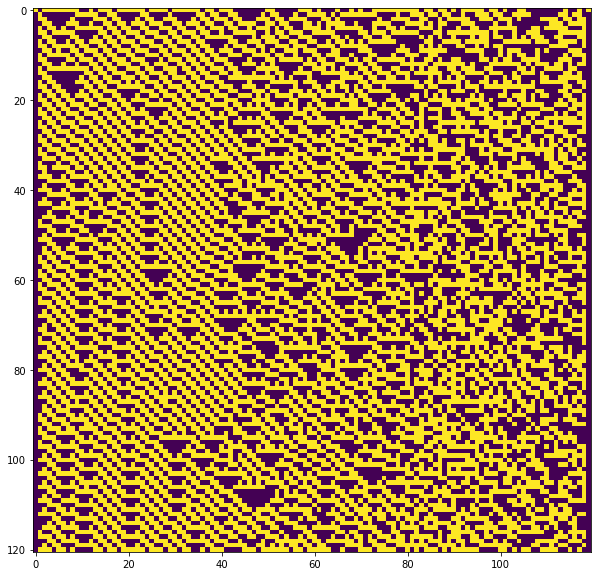

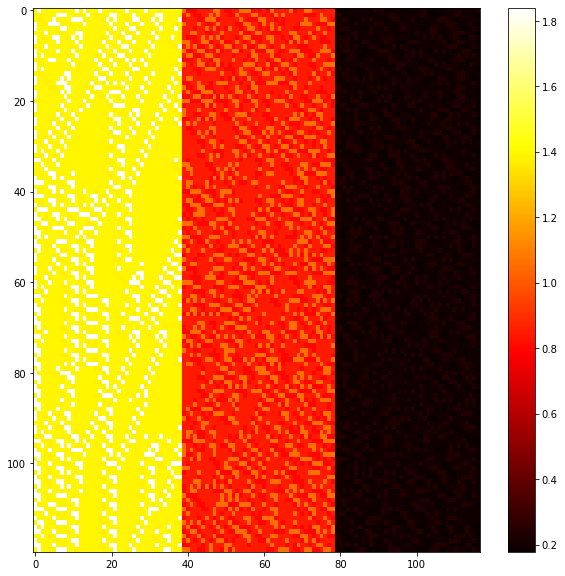

In [4]:

seed = 2050
random.seed(seed)
np.random.seed(seed)
showmatrix,ei_matrix = cellular_automaton2(rule=110, generations=120, p0_list=[0.01,0.1,0.3], size=120, mech_size=2)


# 已知动力学 动力学异质 时空噪声

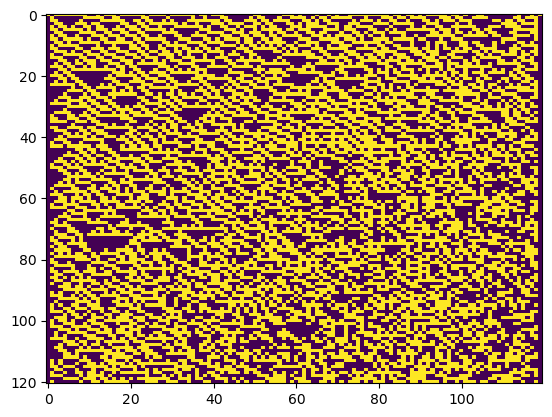

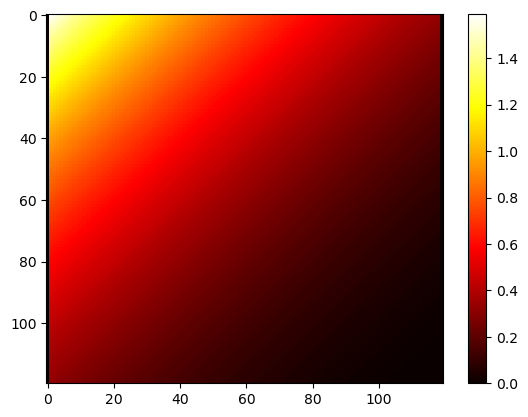

In [2]:
seed = 2050
random.seed(seed)
np.random.seed(seed)
showmatrix,ei_matrix = cellular_automaton_2d(rule=110, generations=120,  size=120, mech_size=2)